(520, 925, 3) <class 'numpy.ndarray'>
(520, 925, 3)


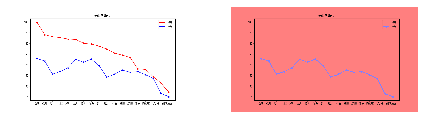

In [29]:
from skimage import color,data
from skimage.io import imread,imshow,show,imread_collection,imshow_collection
import matplotlib.pyplot as plt

img = imread(r'C:\Users\24132\Desktop\Figure_1.png')
img = img[:,:,:3]
print(img.shape,type(img))
hsv = color.rgb2hsv(img)
print(hsv.shape)
hsv[:,:,1] = 0.5
img1 = color.hsv2rgb(hsv)
plt.subplot(121),imshow(img),plt.axis('off')
plt.subplot(122),imshow(img1),plt.axis('off')
plt.show()

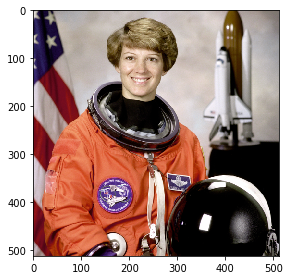

(<matplotlib.image.AxesImage at 0x1278f83bd90>, None)

In [30]:
img = data.astronaut()
imshow(img),show()

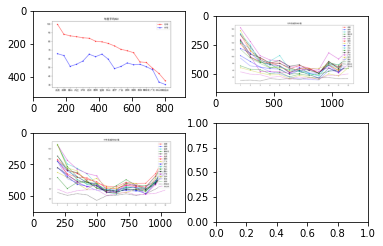

In [32]:
file = [r'C:\Users\24132\Desktop\Figure_1.png',r'C:\Users\24132\Desktop\Figure_2.png',r'C:\Users\24132\Desktop\Figure_3.png']
pic = imread_collection(file)
imshow_collection(pic)
show()

(336, 1) (1, 257)


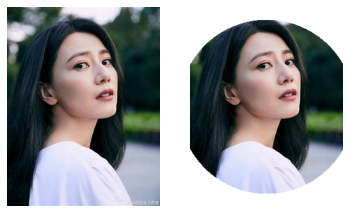

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

img = mpimg.imread(r'C:\Users\24132\Desktop\gyy.jpg')
plt.subplot(121),plt.imshow(img),plt.axis('off')
img_ = img.copy()
# plt.subplot(121),plt.imshow(img),plt.axis('off')
lx,ly,_ = img_.shape
x,y = np.ogrid[:lx,0:ly]
print(x.shape,y.shape)
mask = (x-lx/2)**2 + (y-ly/2)**2 >lx*ly/4
img_[mask,:] = 255
plt.subplot(122),plt.imshow(img_),plt.axis('off')
plt.show()

# 处理图像的基本操作

(336, 257)


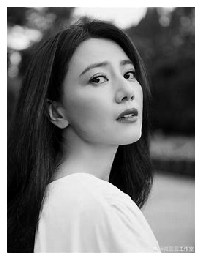

In [7]:
# 灰度图
from skimage.io import imread,imshow,show
from skimage import color
import matplotlib.pyplot as plt
img = imread(r'C:\Users\24132\Desktop\gyy.jpg',as_gray=True)
print(img.shape)
imshow(img)
plt.axis('off')
show()

(336, 257, 3) <class 'numpy.ndarray'>


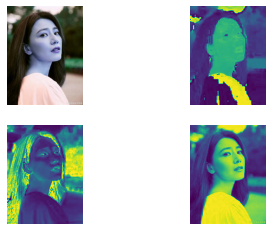

In [13]:
#颜色通道
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r'C:\Users\24132\Desktop\gyy.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
print(hsv.shape,type(hsv))
plt.subplot(221),plt.imshow(img),plt.axis('off')
plt.subplot(222),plt.imshow(hsv[:,:,0]),plt.axis('off')
plt.subplot(223),plt.imshow(hsv[:,:,1]),plt.axis('off')
plt.subplot(224),plt.imshow(hsv[:,:,2]),plt.axis('off')
plt.show()

257 336 RGB JPEG


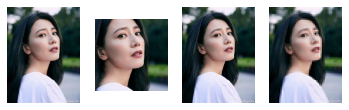

In [1]:
#使用PIL进行图像处理
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open(r'C:\Users\24132\Desktop\gyy.jpg')
# img  = np.array(img)
print(img.width,img.height,img.mode,img.format)

img_c = img.crop((50,50,250,250))
img_large = img.resize((img.width*5,img.height*5),Image.BILINEAR)
img_small = img.resize((img.width//5,img.height//5),Image.ANTIALIAS)
plt.subplot(141),plt.imshow(img),plt.axis('off')
plt.subplot(142),plt.imshow(img_c),plt.axis('off')
plt.subplot(143),plt.imshow(img_large),plt.axis('off')
plt.subplot(144),plt.imshow(img_small),plt.axis('off')
plt.show()

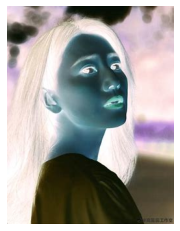

In [2]:
# 图像负片
img = Image.open(r'C:\Users\24132\Desktop\gyy.jpg')
im_t = img.point(lambda x:255-x)   #点变换
plt.imshow(im_t)
plt.axis('off')
plt.show()

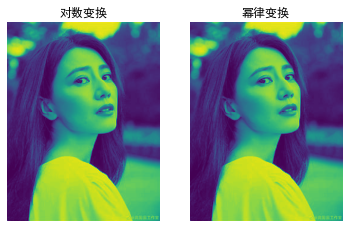

In [3]:
#对数变换
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
img1 = img.copy()
img_g = img.convert('L')
img_g.point(lambda x: 255*(np.log(1+x/255)))
plt.subplot(121),plt.imshow(img_g),plt.axis('off'),plt.title('对数变换')
img_g.point(lambda x:255*(x/255)**0.6)
plt.subplot(122),plt.imshow(img_g),plt.axis('off'),plt.title('幂律变换')
plt.show()

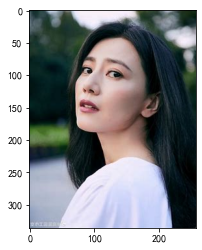

In [11]:
#镜像图像
img = img.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(img)

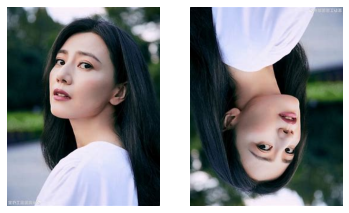

In [14]:
#旋转图像
img_ = img1.rotate(180)
plt.subplot(121),plt.imshow(img1),plt.axis('off')
plt.subplot(122),plt.imshow(img_),plt.axis('off')
plt.show()

(17, 40, 22)

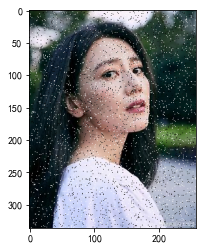

In [22]:
#给图像添加噪声
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open(r'C:\\Users\24132\Desktop\gyy.jpg')
img1 = img.copy()
n = 5000
x,y = np.random.randint(0,img.width,n),np.random.randint(0,img.height,n)
for (x,y) in zip(x,y):
    img1.putpixel((x,y),((0,0,0) if np.random.rand()<0.5 else (255,255,255)))    #得到img1在（x,y）的像素值
plt.imshow(img1)
img1.getpixel((1,1))

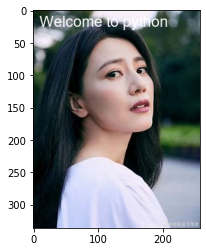

In [10]:
#在图像上添加文本
from PIL import Image,ImageDraw,ImageFont
import matplotlib.pyplot as plt

img = Image.open(r'C:\\Users\24132\Desktop\gyy.jpg')
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('arial.ttf',23)
draw.text((10,5),'Welcome to python',font=font)
del draw
plt.imshow(img)

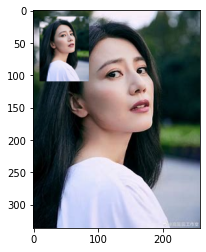

In [15]:
from PIL import Image,ImageDraw,ImageFont
import matplotlib.pyplot as plt

img = Image.open(r'C:\\Users\24132\Desktop\gyy.jpg')
img_thumbnail = img.copy()
img_thumbnail.thumbnail((100,100))
img.paste(img_thumbnail,(10,10))
plt.imshow(img)
# plt.subplot(121),plt.imshow(img_thumbnail)
# plt.subplot(122),plt.imshow(img)

In [23]:
#计算图像的基本统计信息
from PIL import Image,ImageDraw,ImageFont
import matplotlib.pyplot as plt
from PIL import ImageStat as stat

img = Image.open(r'C:\\Users\24132\Desktop\gyy.jpg')
s = stat.Stat(img)
print('maximum and minimum pixel values for each channel RGB:',s.extrema)
print('pixel counts:',s.count)
print('pixel mean:',s.mean)
print('pixel median:',s.median)
print('pixel stddev:',s.stddev)

maximum and minimum pixel values for each channel RGB: [(0, 255), (0, 253), (0, 255)]
pixel counts: [86352, 86352, 86352]
pixel mean: [105.62579905503057, 108.72988465814342, 112.6724453400037]
pixel median: [88, 90, 79]
pixel stddev: [90.46950251733216, 79.78091864939076, 87.6214534756537]


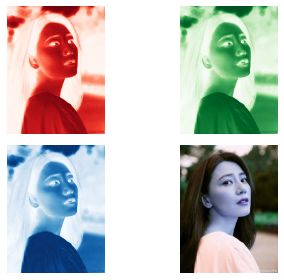

In [25]:
#分离和合并RGB通道
from PIL import Image,ImageDraw,ImageFont
import matplotlib.pyplot as plt

img = Image.open(r'C:\\Users\24132\Desktop\gyy.jpg')
ch_r,ch_g,ch_b = img.split()
plt.subplot(221),plt.imshow(ch_r,cmap=plt.cm.Reds),plt.axis('off')
plt.subplot(222),plt.imshow(ch_g,cmap=plt.cm.Greens),plt.axis('off')
plt.subplot(223),plt.imshow(ch_b,cmap=plt.cm.Blues),plt.axis('off')

img = Image.merge('RGB',(ch_b,ch_g,ch_r))
plt.subplot(224),plt.imshow(img),plt.axis('off')
plt.tight_layout()  #自动调整子图的位置
plt.show()

# 使用matplotlib进行图像操作

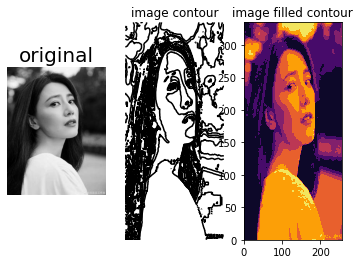

In [31]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread(r'C:\\Users\24132\Desktop\gyy.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

plt.subplot(131),plt.imshow(img,cmap='gray'),plt.title('original',size=20),plt.axis('off')
plt.subplot(132),plt.contour(np.flipud(img),colors='k',levels=np.logspace(-15,15,100)),plt.title('image contour'),plt.axis('off')
plt.subplot(133),plt.title('image filled contour'),plt.contourf(np.flipud(img),cmap='inferno')
plt.show()

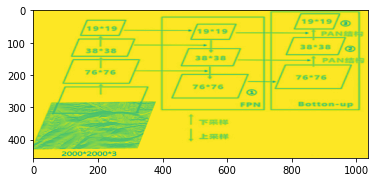

In [6]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt


ori = Image.open(r'C:\Users\24132\Desktop\图片1.png')
ori_gray = ori.convert('L')

ori = np.array(ori)
ori_gray = np.array(ori_gray )
weight = ori.shape[0]
height = ori.shape[1]


ori_pad = np.pad(ori_gray,((1,1),(1,1)),'edge')


t1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
img = np.zeros((weight,height))
for i in range(weight-2):
    for j in range(height-2):
        img[i,j]=np.sum(ori_pad[i:i+3,j:j+3]*t1)
        if img[i,j] < 0:
            img[i,j] = 0

img_sharp = np.zeros((weight,height))
img_sharp = ori_gray - img
# img_ = np.array([[img_sharp] for i in range(3)]).reshape(457,1036,3)


plt.imshow(img_sharp)
plt.show()